In [ ]:
#mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install geopandas
!pip install pysheds
!pip install fiona

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 46.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.special import comb
import xarray as xr
import pandas as pd
import matplotlib.gridspec as gridspec
from pysheds.grid import Grid
from pysheds.view import Raster
import geopandas as gpd
import seaborn as sns
import fiona

In [ ]:
# Membaca data raster
# ----------------------------

grid = Grid.from_raster('/content/drive/MyDrive/Tugas Akhir/TA/Data/Pengolahan DTA/DEM_SUMATERA_GCS.tif')
dem = grid.read_raster('/content/drive/MyDrive/Tugas Akhir/TA/Data/Pengolahan DTA/DEM_SUMATERA_GCS.tif')

In [ ]:
# Membaca data excel koordinat banjir bandang
koordinat_bandang = pd.read_excel('/content/drive/MyDrive/Tugas Akhir/TA/Sidang/Data/koordinat_ff1km_under1k.xlsx',
                        skiprows=0, nrows=98, usecols="A:AF", parse_dates=False)

koordinat_bandang

,OBJECTID,Level0,Level_1,Provinsi,Kabupaten,Kecamatan,Kejadian,Lokasi,Date,Date_new,...,Mengungsi,jumlah_kej,Terendam,Rumah_RB,Rumah_RS,Rumah_RR,Jml_Rumah,Pendidikan,Peribadata,Kesehatan
0,1,13,1371,sumatera barat,kota padang,Kuranji,banjir Bandang,Prov. Sumatera Barat\nKota Padang\nKec. Pauh :...,24-7-2012,2012-7-24,...,3953,1,100,57,55,277,389,2,0,1
1,2,13,1371,sumatera barat,kota padang,Nanggalo,banjir Bandang,Kec. Naggalo\nKel. Tabing Banda Gadang\n,14-5-2015,2015-5-14,...,125,1,20,0,0,0,0,0,0,0
2,3,13,1306,sumatera barat,padang pariaman,Padang Sago,banjir Bandang,0,24-7-2012,2012-7-24,...,0,1,6,1,1,0,2,0,1,0
3,4,13,1306,SUMATERA BARAT,PADANG PARIAMAN,Padang Sago,banjir Bandang,Kab. Padang Pariaman\nKec. 2 x 11 Kayu Tanam\n...,10-12-2018,2018-12-10,...,68,1,70,1,0,0,1,0,2,0
4,6,13,1306,SUMATERA BARAT,PADANG PARIAMAN,IV Koto Aur Malintang,BANJIR BANDANG,"Kec. IV Koto Aur Malintang, Ds. III Koto Aur M...",9-1-2021,2021-1-9,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,136,12,1213,SUMATERA UTARA,LANGKAT,Batang Serangan,BANJIR BANDANG,Kec. Bahorok\nDs. Timbang Jaya\n,18-11-2020,2020-11-18,...,0,1,0,0,0,0,0,0,0,0
89,137,12,1213,sumatera utara,langkat,Batang Serangan,banjir Bandang,sei bingai,29-5-2016,2016-5-29,...,0,1,0,0,0,0,0,0,0,0
90,139,13,1308,SUMATERA BARAT,LIMA PULUH KOTA,Pangkalan Koto Baru,BANJIR BANDANG,KEC. PANGKALAN KOTO BARU\nDS. KOTO ALAM,9-11-2020,2020-11-9,...,0,1,0,3,0,0,3,0,0,0
91,140,13,1308,sumatera barat,lima puluh kota,Pangkalan Koto Baru,banjir Bandang,Prov. Sumatra Barat\nKab. 50 Kota\nKec. Pangka...,28-1-2011,2011-1-28,...,0,1,1473,0,0,0,0,0,0,0


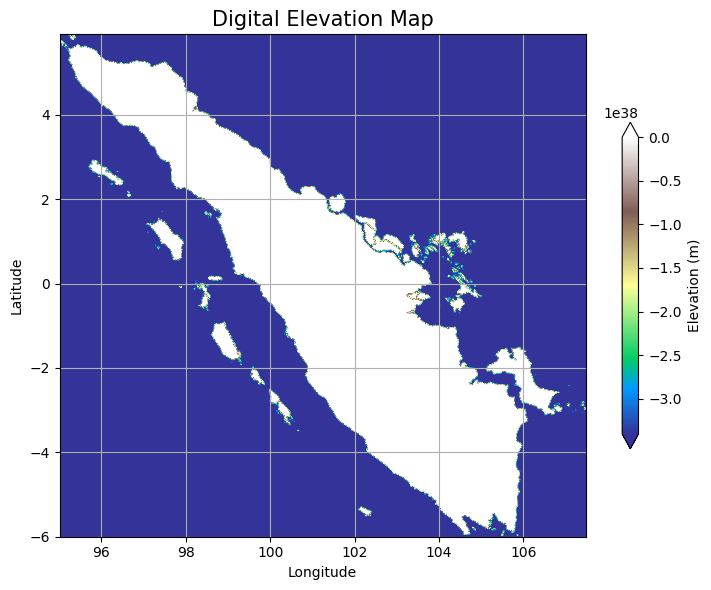

In [ ]:
#Plotting Data DEM Sumatera

fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)

plt.imshow(dem, extent=grid.extent, cmap='terrain', zorder=1)
plt.colorbar(label='Elevation (m)', shrink=0.65, extend='both')
plt.grid(zorder=0)
plt.title('Digital Elevation Map', size=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

In [ ]:
# Condition Data DEM
# ----------------------
# Fill pits in DEM
pit_filled_dem = grid.fill_pits(dem)

# Fill depressions in DEM
flooded_dem = grid.fill_depressions(pit_filled_dem)

# Resolve flats in DEM
inflated_dem = grid.resolve_flats(flooded_dem)

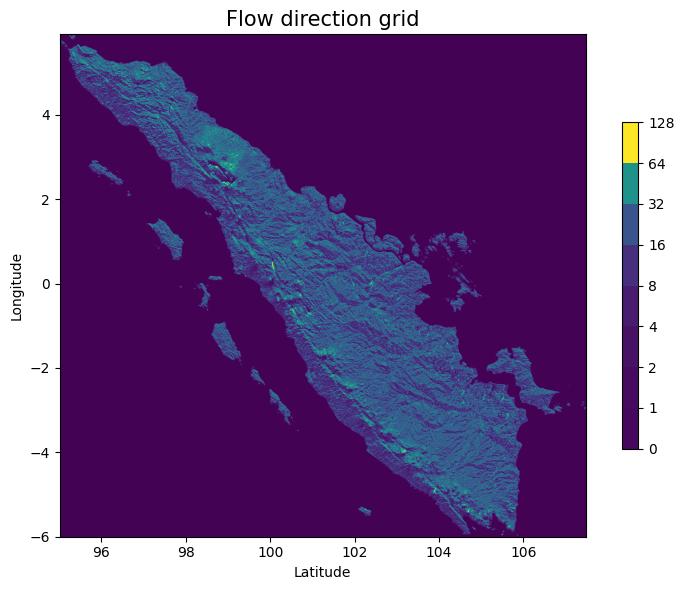

In [ ]:
  # Elevation To Flow Direction
  # ---------------------
  # Determine D8 flow directions from DEM
  # ----------------------
  # Specify directional mapping
  dirmap = (64, 128, 1, 2, 4, 8, 16, 32)

  # Compute flow directions
  # -------------------------------------
  fdir = grid.flowdir(inflated_dem, dirmap=dirmap)

  #--------------------------------------
  #Plotting
  # -------------------------
  fig = plt.figure(figsize=(8,6))
  fig.patch.set_alpha(0)

  plt.imshow(fdir, extent=grid.extent, cmap='viridis', zorder=2)
  boundaries = ([0] + sorted(list(dirmap)))
  plt.colorbar(boundaries= boundaries,
              values=sorted(dirmap), shrink=0.65)
  plt.xlabel('Latitude')
  plt.ylabel('Longitude')
  plt.title('Flow direction grid', size=15)
  plt.grid(zorder=-1)
  plt.tight_layout()

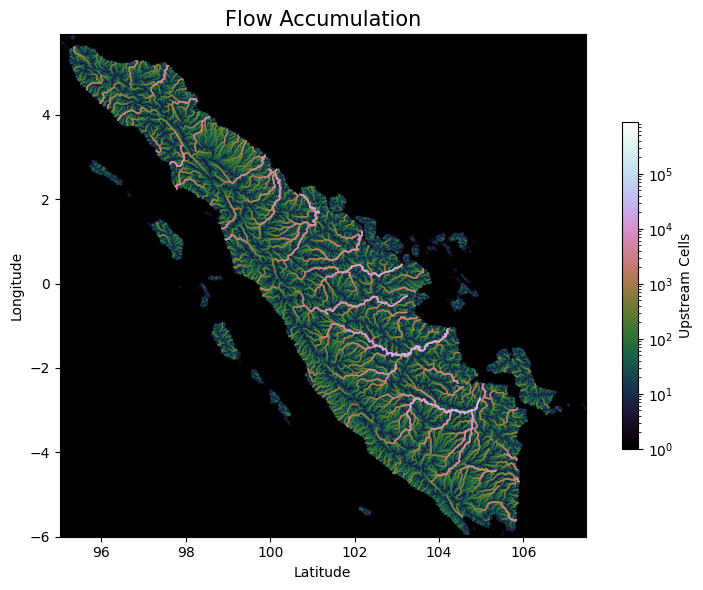

In [ ]:
# Calculate flow accumulation
# --------------------------
acc = grid.accumulation(fdir, dirmap=dirmap)

#---------------------------
#Plotting
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)
plt.grid('on', zorder=0)
im = ax.imshow(acc, extent=grid.extent, zorder=2,
               cmap='cubehelix',
               norm=colors.LogNorm(1, acc.max()),
               interpolation='bilinear')
plt.colorbar(im, ax=ax, label='Upstream Cells', shrink=0.65)
plt.title('Flow Accumulation', size=15)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.tight_layout()

accumulation : Compute the number of cells upstream of each cell; if weights are given, compute the sum of weighted cells upstream of each cell.

snap_to_mask : Snaps a set of points to the nearest nonzero cell in a boolean mask; useful for finding pour points from an accumulation raster

Referensi: https://github.com/mdbartos/pysheds/blob/master/recipes/write_shapefile.ipynb

In [ ]:
  # Menggambarkan DTA dari arah aliran/flow direction
  koor = koordinat_bandang[['Date','Lon', 'Lat']]

  points_all = pd.DataFrame()

  for i in range (0,len(koor)):

    # Delineate a catchment
    # ---------------------
    # Specify pour point/outle
    koor_per_grid = koor['Lon'][i], koor['Lat'][i]

    # Reset view
    grid.viewfinder = fdir.viewfinder

    # Compute accumulation
    acc = grid.accumulation(fdir)

    # Snap pour point to high accumulation cell
    x_snap, y_snap = grid.snap_to_mask(acc > 1000, (koor_per_grid))

    # Delineate the catchment
    catch = grid.catchment(x=x_snap, y=y_snap, fdir=fdir, dirmap=dirmap,
                          xytype='coordinate')

    # Crop and plot the catchment
    # ---------------------------
    # Clip the bounding box to the catchment
    grid.clip_to(catch)
    clipped_catch = grid.view(catch)

  ###############################################################################################

    # Calling grid.polygonize without arguments will default to the catchment mask
    shapes = grid.polygonize()

    # Is equivalent to...
    #shapes = catch.polygonize(grid.mask.astype(np.uint8))

    schema = {
      'geometry': 'Polygon',
      'properties': {'LABEL': 'float:16'}
    }

    with fiona.open('/content/drive/MyDrive/Tugas Akhir/TA/Sidang/Data/shp/catchment_{}.shp'.format(i+1), 'w',
                    driver='ESRI Shapefile',
                    crs=grid.crs.srs,
                    schema=schema) as c:
        j = 0
        for shape, value in shapes:
            rec = {}
            rec['geometry'] = shape
            rec['properties'] = {'LABEL' : str(value)}
            rec['id'] = str(i)
            c.write(rec)
            j += 1

  ###############################################################################################

    shp = gpd.read_file('/content/drive/MyDrive/Tugas Akhir/TA/Sidang/Data/shp/catchment_{}.shp'.format(i+1))
    print()
    shp.head()

  ########################### Ubah Shapefile ke Titik Berat/Centroid ####################################

    # copy GeoDataFrame
    points = shp.copy()

    print(points)

    # change geometry
    points['geometry'] = points['geometry'].centroid
    points["tanggal"] =  koordinat_bandang['Date'][i]
    #points['geometry'] = points['geom_point_{}'.format(i+1)]

    points_all = pd.concat([points_all, points])

  print(points_all)


   LABEL                                           geometry
0      1  POLYGON ((100.51920 -0.79140, 100.53046 -0.791...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((100.51920 -0.79140, 100.53046 -0.791...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((100.26030 -0.35465, 100.26931 -0.354...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((100.26030 -0.35465, 100.26931 -0.354...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((100.18601 -0.20607, 100.19051 -0.206...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((103.08567 -4.00624, 103.09467 -4.006...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((102.61515 -3.80137, 102.61965 -3.801...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((102.95960 -3.74734, 102.96635 -3.747...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((102.95960 -3.74734, 102.96635 -3.747...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((102.53410 -3.65954, 102.54761 -3.659...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((102.20767 -3.12599, 102.21892 -3.125...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((102.25494 -3.04494, 102.28196 -3.044...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((104.98125 -5.58439, 104.98350 -5.584...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((104.62330 -5.39528, 104.63005 -5.395...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((104.36440 -5.14989, 104.36665 -5.149...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((104.36440 -5.14989, 104.36665 -5.149...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((104.20906 -4.86173, 104.22257 -4.861...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((103.46839 -4.35519, 103.47739 -4.355...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((103.46839 -4.35519, 103.47739 -4.355...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((103.97042 -4.57807, 103.97493 -4.578...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((103.97042 -4.57807, 103.97493 -4.578...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((103.83760 -4.23137, 103.84210 -4.231...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((103.57870 -4.35519, 103.58770 -4.355...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((103.74755 -4.27639, 103.75655 -4.276...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((103.29954 -4.09179, 103.30179 -4.091...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((103.12844 -4.01975, 103.13069 -4.019...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((103.37834 -3.76085, 103.38509 -3.760...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((103.20949 -3.73834, 103.21174 -3.738...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((103.43011 -3.72258, 103.43462 -3.722...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((101.89699 -2.48212, 101.90374 -2.482...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((101.53678 -2.20746, 101.53904 -2.207...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((102.06358 -2.18945, 102.07034 -2.189...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((101.40396 -1.91930, 101.42872 -1.919...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((101.56605 -1.88553, 101.57506 -1.885...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((101.66286 -1.87202, 101.66961 -1.872...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((101.27789 -1.82925, 101.28239 -1.829...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((101.24637 -1.72344, 101.24862 -1.723...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((100.94244 -1.47354, 100.95145 -1.473...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((101.87673 -1.57710, 101.88123 -1.577...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((100.89967 -1.26868, 100.91993 -1.268...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((101.28014 -1.39024, 101.28239 -1.390...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((100.77585 -1.10433, 100.78485 -1.104...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((100.78711 -0.81617, 100.79386 -0.816...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((100.78260 -0.80041, 100.78936 -0.800...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((101.03700 -0.68109, 101.03925 -0.681...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((101.04825 -0.64057, 101.05276 -0.640...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((100.46067 -0.38842, 100.46517 -0.388...
1      1  POLYGON ((100.52821 -0.32088, 100.53946 -0.320...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((100.26706 0.09110, 100.28057 0.09110...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((99.89335 0.47157, 99.90910 0.47157, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((100.13648 0.27346, 100.14549 0.27346...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((100.08245 0.38827, 100.08470 0.38827...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((100.08245 0.38827, 100.08470 0.38827...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((100.08245 0.38827, 100.08470 0.38827...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((99.68172 0.49633, 99.69073 0.49633, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((99.42958 0.81827, 99.43408 0.81827, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((99.35304 0.85204, 99.36429 0.85204, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((99.22471 0.92858, 99.22696 0.92858, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((99.44759 1.23701, 99.45209 1.23701, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((99.63670 1.23701, 99.64120 1.23701, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((99.24948 1.52742, 99.25398 1.52742, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((99.24948 1.52742, 99.25398 1.52742, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((99.24948 1.52742, 99.25398 1.52742, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((97.72085 3.40724, 97.72761 3.40724, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((97.19405 3.94080, 97.20756 3.94080, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((97.34939 3.98132, 97.35615 3.98132, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((97.34939 3.98132, 97.35615 3.98132, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((96.84060 4.67022, 96.84510 4.67022, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((96.71228 4.59142, 96.71903 4.59142, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((96.84060 4.67022, 96.84510 4.67022, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((96.69202 4.59592, 96.69427 4.59592, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((96.91940 4.83456, 96.92165 4.83456, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((96.74605 4.91110, 96.75055 4.91110, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((95.82977 5.10246, 95.83428 5.10246, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((96.06841 5.11597, 96.07516 5.11597, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((96.59296 5.09346, 96.59971 5.09346, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((96.90814 5.13848, 96.91489 5.13848, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((95.88381 5.16550, 95.89056 5.16550, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((95.64742 5.44691, 95.65643 5.44691, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((95.64742 5.44691, 95.65643 5.44691, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((95.56412 5.46492, 95.56637 5.46492, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((99.11215 3.02903, 99.12341 3.02903, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((98.04279 3.15285, 98.04504 3.15285, ...
1      1  POLYGON ((98.07881 3.19337, 98.08781 3.19337, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((98.60336 3.36672, 98.60786 3.36672, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((98.55158 3.45452, 98.56509 3.45452, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((97.81766 3.68415, 97.82216 3.68415, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((97.81766 3.68415, 97.82216 3.68415, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((98.46828 3.60761, 98.47278 3.60761, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((98.48629 3.60311, 98.49079 3.60311, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((98.09907 3.67065, 98.11033 3.67065, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((97.94373 3.80572, 97.94598 3.80572, ...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((100.43591 0.08660, 100.44266 0.08660...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((100.60925 0.11587, 100.61151 0.11587...


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid



   LABEL                                           geometry
0      1  POLYGON ((100.53271 0.19016, 100.53946 0.19016...
    LABEL                    geometry     tanggal
0       1  POINT (100.49981 -0.86507)   24-7-2012
0       1  POINT (100.49413 -0.86808)   14-5-2015
0       1  POINT (100.27071 -0.45745)   24-7-2012
0       1  POINT (100.27071 -0.45745)  10-12-2018
0       1  POINT (100.18424 -0.31208)    9-1-2021
..    ...                         ...         ...
0       1    POINT (98.08348 3.61437)  18-11-2020
0       1    POINT (98.03031 3.67379)   29-5-2016
0       1   POINT (100.46392 0.01587)   9-11-2020
0       1   POINT (100.61111 0.04305)   28-1-2011
0       1   POINT (100.51553 0.15074)   22-7-2020

[95 rows x 3 columns]


<ipython-input-24-461f5a0b4a41>:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid


In [ ]:
# #Save data centroid ke csv
# points_all.to_excel("/content/drive/MyDrive/Tugas Akhir/TA/Sidang/Data/centroid_area_under1k.xlsx", index=False)

In [ ]:
data_point=pd.read_excel("/content/drive/MyDrive/Tugas Akhir/TA/Sidang/Data/centroid_area_under1k.xlsx")
data_point

,Centroid,geometry,tanggal,hari,bulan,tahun,date,tanggal_fix
0,1,POINT (100.49981049572239 -0.8650666211426935),24-7-2012,24,7,2012,2012-7-24,2012-7-24
1,2,POINT (100.49413168718442 -0.8680840800275689),14-5-2015,14,5,2015,2015-5-14,2015-5-14
2,3,POINT (100.27071241941778 -0.4574512281653418),24-7-2012,24,7,2012,2012-7-24,2012-7-24
3,4,POINT (100.27071241941778 -0.4574512281653418),10-12-2018,10,12,2018,2018-12-10,2018-12-10
4,5,POINT (100.18424377046533 -0.3120751452095314),9-1-2021,9,1,2021,2021-1-9,2021-1-9
...,...,...,...,...,...,...,...,...
90,91,POINT (98.08347604465315 3.614368866728707),18-11-2020,18,11,2020,2020-11-18,2020-11-18
91,92,POINT (98.03031174590635 3.6737872935545814),29-5-2016,29,5,2016,2016-5-29,2016-5-29
92,93,POINT (100.46392124290186 0.0158685865110505),9-11-2020,9,11,2020,2020-11-9,2020-11-9
93,94,POINT (100.61110773467394 0.0430482643908401),28-1-2011,28,1,2011,2011-1-28,2011-1-28


In [ ]:
# #Save data centroid ke csv
# data_centroid.to_excel("/content/drive/MyDrive/Tugas Akhir/TA/Sidang/Data/tanggal_kajian.xlsx", index=False)

In [ ]:
list_polygon = []
for i in range (0,93):
  polygons = gpd.read_file('/content/drive/MyDrive/Tugas Akhir/TA/Sidang/Data/shp/catchment_{}.shp'.format(i+1))
  list_polygon.append(polygons)
  concat_polygons = pd.concat(list_polygon, ignore_index=True)
concat_polygons

,LABEL,geometry
0,1,"POLYGON ((100.51920 -0.79140, 100.53046 -0.791..."
1,1,"POLYGON ((100.51920 -0.79140, 100.53046 -0.791..."
2,1,"POLYGON ((100.26030 -0.35465, 100.26931 -0.354..."
3,1,"POLYGON ((100.26030 -0.35465, 100.26931 -0.354..."
4,1,"POLYGON ((100.18601 -0.20607, 100.19051 -0.206..."
...,...,...
90,1,"POLYGON ((98.09907 3.67065, 98.11033 3.67065, ..."
91,1,"POLYGON ((97.94373 3.80572, 97.94598 3.80572, ..."
92,1,"POLYGON ((100.43591 0.08660, 100.44266 0.08660..."
93,1,"POLYGON ((100.60925 0.11587, 100.61151 0.11587..."


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
polygons.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
concat_polygons

,LABEL,geometry
0,1,"POLYGON ((100.51920 -0.79140, 100.53046 -0.791..."
1,1,"POLYGON ((100.51920 -0.79140, 100.53046 -0.791..."
2,1,"POLYGON ((100.26030 -0.35465, 100.26931 -0.354..."
3,1,"POLYGON ((100.26030 -0.35465, 100.26931 -0.354..."
4,1,"POLYGON ((100.18601 -0.20607, 100.19051 -0.206..."
...,...,...
90,1,"POLYGON ((98.09907 3.67065, 98.11033 3.67065, ..."
91,1,"POLYGON ((97.94373 3.80572, 97.94598 3.80572, ..."
92,1,"POLYGON ((100.43591 0.08660, 100.44266 0.08660..."
93,1,"POLYGON ((100.60925 0.11587, 100.61151 0.11587..."


In [ ]:
concat_polygons = concat_polygons.to_crs({'init':'EPSG:21149'})

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
concat_polygons.crs

<Projected CRS: EPSG:21149>
Name: Batavia / UTM zone 49S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Indonesia - onshore Java and Madura and offshore southern Java Sea and Madura Strait - between 108°E and 114°E.
- bounds: (108.0, -8.67, 114.0, -4.27)
Coordinate Operation:
- name: UTM zone 49S
- method: Transverse Mercator
Datum: Batavia
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

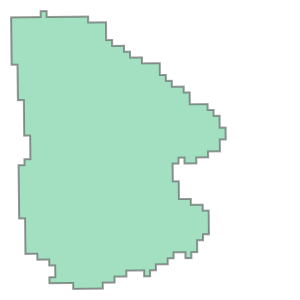

In [ ]:
#calculate the area
concat_polygons.loc[12,'geometry']

In [ ]:
from shapely.geometry import shape
for i in range (len(concat_polygons)):
  concat_polygons.loc[i,'area_m2'] = shape(concat_polygons.loc[i,'geometry']).area
concat_polygons

,LABEL,geometry,area_m2
0,1,"POLYGON ((-672854.910 9911082.124, -671581.096...",1.303252e+08
1,1,"POLYGON ((-672854.910 9911082.124, -671581.096...",1.379395e+08
2,1,"POLYGON ((-702258.778 9960147.036, -701238.772...",2.032597e+08
3,1,"POLYGON ((-702258.778 9960147.036, -701238.772...",2.032597e+08
4,1,"POLYGON ((-710690.610 9976859.301, -710180.469...",2.973486e+08
...,...,...,...
90,1,"POLYGON ((-944982.336 10416326.561, -943700.03...",1.497279e+08
91,1,"POLYGON ((-962452.196 10431914.199, -962195.61...",9.306653e+08
92,1,"POLYGON ((-682395.728 10009788.810, -681631.15...",2.674514e+08
93,1,"POLYGON ((-662775.807 10013072.476, -662521.08...",9.286761e+07


In [ ]:
concat_polygons['area_km2'] = concat_polygons['area_m2']/1000000
concat_polygons

,LABEL,geometry,area_m2,area_km2
0,1,"POLYGON ((-672854.910 9911082.124, -671581.096...",1.303252e+08,130.325204
1,1,"POLYGON ((-672854.910 9911082.124, -671581.096...",1.379395e+08,137.939508
2,1,"POLYGON ((-702258.778 9960147.036, -701238.772...",2.032597e+08,203.259681
3,1,"POLYGON ((-702258.778 9960147.036, -701238.772...",2.032597e+08,203.259681
4,1,"POLYGON ((-710690.610 9976859.301, -710180.469...",2.973486e+08,297.348634
...,...,...,...,...
90,1,"POLYGON ((-944982.336 10416326.561, -943700.03...",1.497279e+08,149.727893
91,1,"POLYGON ((-962452.196 10431914.199, -962195.61...",9.306653e+08,930.665319
92,1,"POLYGON ((-682395.728 10009788.810, -681631.15...",2.674514e+08,267.451392
93,1,"POLYGON ((-662775.807 10013072.476, -662521.08...",9.286761e+07,92.867611


In [ ]:
# #Save data centroid ke csv
# concat_polygons.to_excel("/content/drive/MyDrive/Tugas Akhir/TA/Sidang/Data/luas_centroid.xlsx", index=False)

In [ ]:
area = pd.concat([concat_polygons, data_point['date'],data_point['tahun'],data_point['tanggal']], axis=1)
area

,LABEL,geometry,area_m2,area_km2,date,tahun,tanggal
0,1,"POLYGON ((-672854.910 9911082.124, -671581.096...",1.303252e+08,130.325204,2012-7-24,2012,24-7-2012
1,1,"POLYGON ((-672854.910 9911082.124, -671581.096...",1.379395e+08,137.939508,2015-5-14,2015,14-5-2015
2,1,"POLYGON ((-702258.778 9960147.036, -701238.772...",2.032597e+08,203.259681,2012-7-24,2012,24-7-2012
3,1,"POLYGON ((-702258.778 9960147.036, -701238.772...",2.032597e+08,203.259681,2018-12-10,2018,10-12-2018
4,1,"POLYGON ((-710690.610 9976859.301, -710180.469...",2.973486e+08,297.348634,2021-1-9,2021,9-1-2021
...,...,...,...,...,...,...,...
90,1,"POLYGON ((-944982.336 10416326.561, -943700.03...",1.497279e+08,149.727893,2020-11-18,2020,18-11-2020
91,1,"POLYGON ((-962452.196 10431914.199, -962195.61...",9.306653e+08,930.665319,2016-5-29,2016,29-5-2016
92,1,"POLYGON ((-682395.728 10009788.810, -681631.15...",2.674514e+08,267.451392,2020-11-9,2020,9-11-2020
93,1,"POLYGON ((-662775.807 10013072.476, -662521.08...",9.286761e+07,92.867611,2011-1-28,2011,28-1-2011


In [ ]:
# #Save data centroid ke csv
# area.to_excel("/content/drive/MyDrive/Tugas Akhir/TA/Sidang/Data/luas_centroid_new.xlsx", index=False)

In [ ]:
area_sort = area.sort_values('tahun')
area_sort

,LABEL,geometry,area_m2,area_km2,date,tahun,tanggal
23,1,"POLYGON ((-307045.036 9523545.090, -306037.741...",2.884904e+08,288.490358,2011-4-24,2011,24-4-2011
89,1,"POLYGON ((-901011.481 10408043.065, -900499.29...",1.130859e+08,113.085892,2011-4-1,2011,1-4-2011
88,1,"POLYGON ((-903053.205 10408581.503, -902540.98...",3.210047e+08,321.004693,2011-5-19,2011,19-5-2011
32,1,"POLYGON ((-572365.361 9784879.606, -569572.090...",7.669804e+07,76.698041,2011-4-20,2011,20-4-2011
37,1,"POLYGON ((-624722.675 9834620.275, -623705.244...",2.993203e+08,299.320298,2011-11-3,2011,3-11-2011
...,...,...,...,...,...,...,...
4,1,"POLYGON ((-710690.610 9976859.301, -710180.469...",2.973486e+08,297.348634,2021-1-9,2021,9-1-2021
22,1,"POLYGON ((-325849.448 9514580.708, -324841.881...",1.120145e+08,112.014497,2021-1-29,2021,29-1-2021
36,1,"POLYGON ((-590265.582 9806746.107, -590011.491...",1.013885e+08,101.388548,2021-3-1,2021,1-3-2021
71,1,"POLYGON ((-1077229.678 10551019.578, -1076972....",3.955531e+08,395.553115,2021-1-16,2021,16-1-2021


In [ ]:
x = area_sort.sort_values('date')
x

,LABEL,geometry,area_m2,area_km2,date,tahun,tanggal
93,1,"POLYGON ((-662775.807 10013072.476, -662521.08...",9.286761e+07,92.867611,2011-1-28,2011,28-1-2011
42,1,"POLYGON ((-642543.633 9908376.967, -641780.000...",1.170265e+08,117.026463,2011-11-27,2011,27-11-2011
37,1,"POLYGON ((-624722.675 9834620.275, -623705.244...",2.993203e+08,299.320298,2011-11-3,2011,3-11-2011
74,1,"POLYGON ((-1173927.736 10585330.157, -1173153....",9.978149e+07,99.781486,2011-3-10,2011,10-3-2011
89,1,"POLYGON ((-901011.481 10408043.065, -900499.29...",1.130859e+08,113.085892,2011-4-1,2011,1-4-2011
...,...,...,...,...,...,...,...
4,1,"POLYGON ((-710690.610 9976859.301, -710180.469...",2.973486e+08,297.348634,2021-1-9,2021,9-1-2021
36,1,"POLYGON ((-590265.582 9806746.107, -590011.491...",1.013885e+08,101.388548,2021-3-1,2021,1-3-2021
58,1,"POLYGON ((-794160.721 10139624.280, -793649.39...",3.708387e+08,370.838679,2021-3-12,2021,12-3-2021
33,1,"POLYGON ((-554106.700 9788766.223, -553091.404...",1.851390e+08,185.138992,2021-4-15,2021,15-4-2021


In [ ]:
# #Save data centroid ke csv
# area_sort.to_excel("/content/drive/MyDrive/Tugas Akhir/TA/Sidang/Data/luas_area_new.xlsx", index=False)

In [ ]:
data=pd.read_excel("/content/drive/MyDrive/Tugas Akhir/TA/Sidang/Data/luas_area_fix.xlsx")
data

,LABEL,geometry,area_m2,area_km2,date,tahun,tanggal
0,1,POLYGON ((-307045.03557066456 9523545.08987775...,2.884904e+08,288.490358,2011-4-24,2011,24-4-2011
1,1,POLYGON ((-901011.4807473829 10408043.06464460...,1.130859e+08,113.085892,2011-4-1,2011,1-4-2011
2,1,POLYGON ((-903053.2046298732 10408581.50286686...,3.210047e+08,321.004693,2011-5-19,2011,19-5-2011
3,1,POLYGON ((-572365.3613625297 9784879.606453402...,7.669804e+07,76.698041,2011-4-20,2011,20-4-2011
4,1,"POLYGON ((-624722.6749741333 9834620.27545895,...",2.993203e+08,299.320298,2011-11-3,2011,3-11-2011
...,...,...,...,...,...,...,...
88,1,"POLYGON ((-710690.6098319395 9976859.30072642,...",2.973486e+08,297.348634,2021-1-9,2021,9-1-2021
89,1,POLYGON ((-325849.4482572591 9514580.708249371...,1.120145e+08,112.014497,2021-1-29,2021,29-1-2021
90,1,POLYGON ((-590265.5817909548 9806746.107129574...,1.013885e+08,101.388548,2021-3-1,2021,1-3-2021
91,1,POLYGON ((-1077229.6783068436 10551019.5779596...,3.955531e+08,395.553115,2021-1-16,2021,16-1-2021


<ipython-input-6-1d6a0c50fa48>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


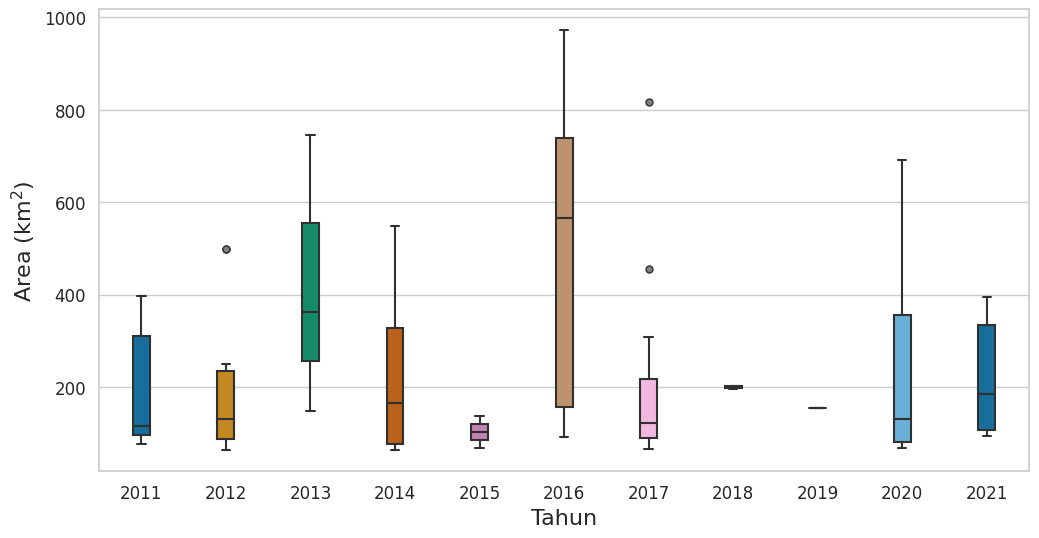

In [ ]:
# area_sort['date'] = pd.to_datetime(area_sort['date'])  # Convert "Date" column to datetime format

data['date'] = pd.to_datetime(data['date'])
# use to set style of background of plot
import seaborn
seaborn.set(style="whitegrid")

fig = plt.figure(figsize=(12, 6))
ax = seaborn.boxplot(
    data=data,
    x=data['date'].dt.year,
    y='area_km2', width=0.2, palette="colorblind", flierprops={'marker': 'o', 'markerfacecolor': 'gray', 'markersize': 5}
)

plt.xlabel("Tahun", size=16)
plt.ylabel("Area ($\mathrm{km}^2$)", size=16)
# ax.set_title('Luas Wilayah Catchment Banjir Bandang', fontsize=18, fontweight="bold")

ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

plt.show()


<ipython-input-9-44a0cf2c1c40>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


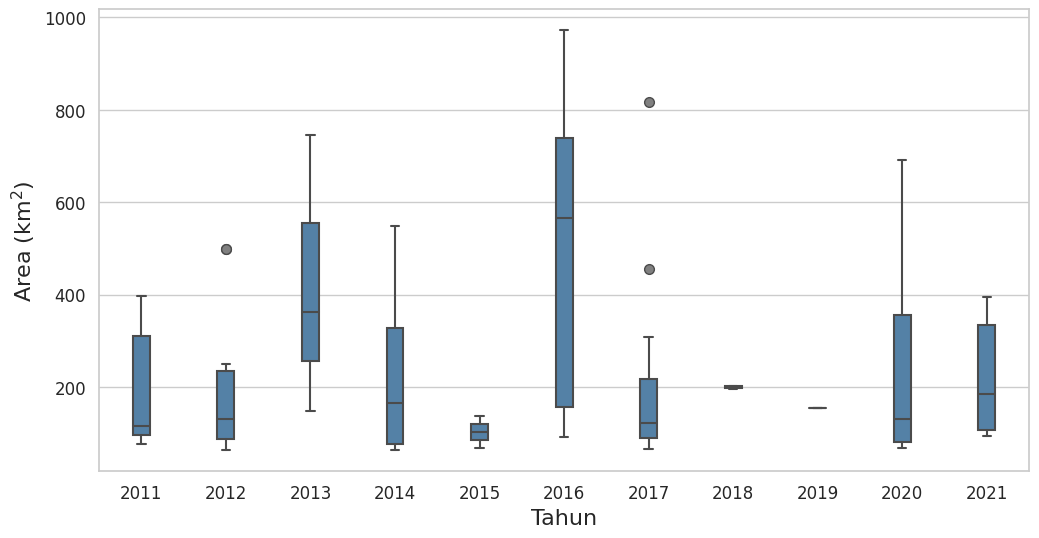

In [ ]:
import seaborn as sns

# Set style of background plot
sns.set(style="whitegrid")

# Define a custom palette with a shade of yellow
custom_palette = ["steelblue"]

# Create boxplot with the custom palette
fig = plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    data=data,
    x=data['date'].dt.year,
    y='area_km2',
    width=0.2,
    palette=custom_palette,
    flierprops={'marker': 'o', 'markerfacecolor': 'gray', 'markersize': 7, 'color': 'grey'}  # Change outlier edge color
)

plt.xlabel("Tahun", size=16)
plt.ylabel("Area ($\mathrm{km}^2$)", size=16)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

plt.show()


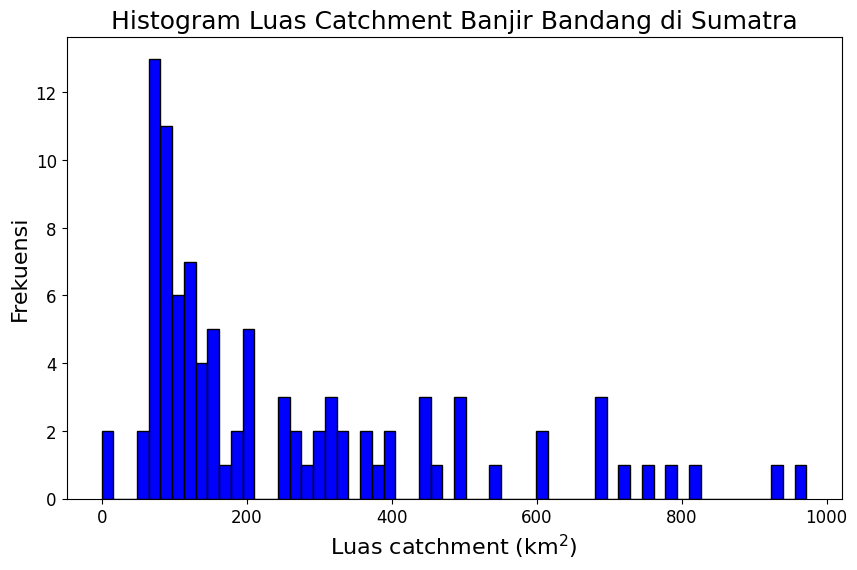

In [ ]:
fig = plt.figure(figsize=(10, 6))
# Load and preprocess the data
catchment_area = area_sort['area_km2']

# Plot the histogram
plt.hist(catchment_area, bins=int(180/3), color='blue', edgecolor='black',)  # Adjust the number of bins as needed
plt.xlabel('Luas catchment ($\mathrm{km}^2$)',size=16)
plt.ylabel('Frekuensi',size=16)
plt.title('Histogram Luas Catchment Banjir Bandang di Sumatra',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


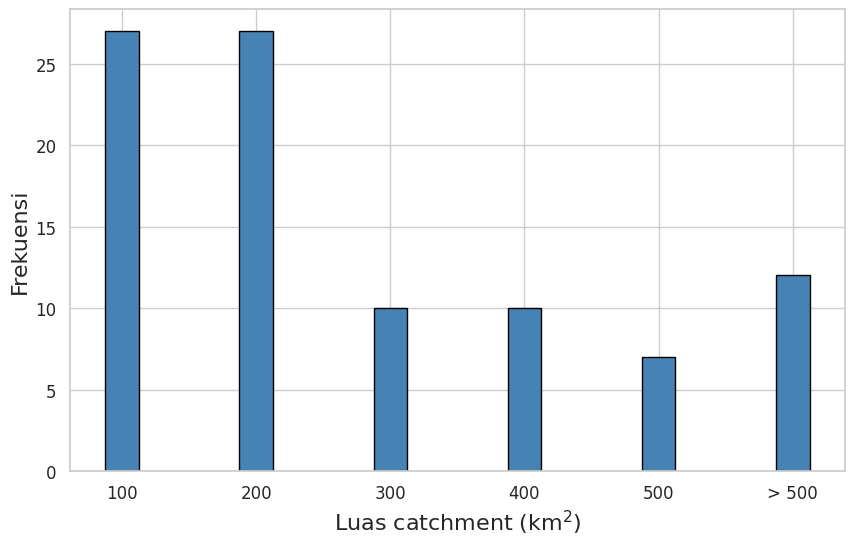

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 6))
# Load and preprocess the data
catchment_area = data['area_km2']

# Define the bin edges
bin_edges = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# Assign the catchment areas to the corresponding bins
bin_indices = np.digitize(catchment_area, bin_edges)

# Calculate the frequencies for each bin
bin_frequencies = np.bincount(bin_indices)

# Split the data into two parts based on the threshold
threshold = 500
x1 = bin_edges[:5]
y1 = bin_frequencies[:5]
x2 = ["> 500"]
y2 = np.sum(bin_frequencies[5:])

# Add the total frequency to the "> 300" category
if y2 > 0:
    x1 = np.append(x1, x2[0])
    y1 = np.append(y1, y2)

# Create an array of x-axis positions
x_pos = np.arange(len(x1))

# Set the width of the bars
bar_width = 0.25

plt.bar(x_pos, y1, color='steelblue', width=bar_width, edgecolor='black')


# # Set the labels on the x-axis
plt.xticks(x_pos, x1)

plt.xlabel('Luas catchment ($\mathrm{km}^2$)',size=16)
plt.ylabel('Frekuensi',size=16)
# plt.title('Histogram Luas Catchment Banjir Bandang di Sumatra',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the chart
plt.show()


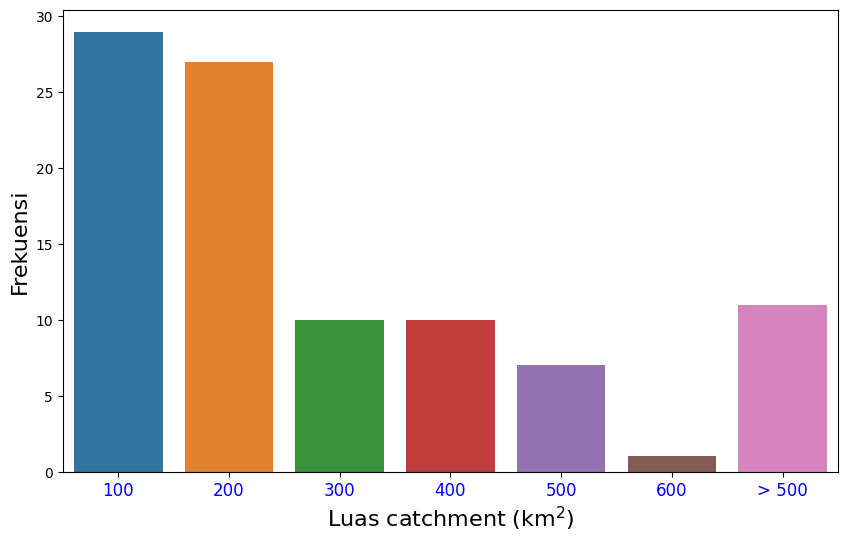

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig = plt.figure(figsize=(10, 6))
# Load and preprocess the data
catchment_area = area_sort['area_km2']

# Define the bin edges
bin_edges = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# Assign the catchment areas to the corresponding bins
bin_indices = np.digitize(catchment_area, bin_edges)

# Calculate the frequencies for each bin
bin_frequencies = np.bincount(bin_indices)

# Split the data into two parts based on the threshold
threshold = 500
x1 = bin_edges[:6]
y1 = bin_frequencies[:6]
x2 = ["> 500"]
y2 = np.sum(bin_frequencies[6:])

# Add the total frequency to the "> 1000" category
if y2 > 0:
    x1 = np.append(x1, x2[0])
    y1 = np.append(y1, y2)

# Create an array of x-axis positions
x_pos = np.arange(len(x1))

# seaborn bar plot
sns.barplot(x=x_pos, y=y1)

# Set the labels on the x-axis
plt.xticks(x_pos, x1)
plt.setp(plt.gca().get_xticklabels(), color='blue', fontsize=12)

plt.xlabel('Luas catchment ($\mathrm{km}^2$)', size=16)
plt.ylabel('Frekuensi', size=16)

# Show the chart
plt.show()


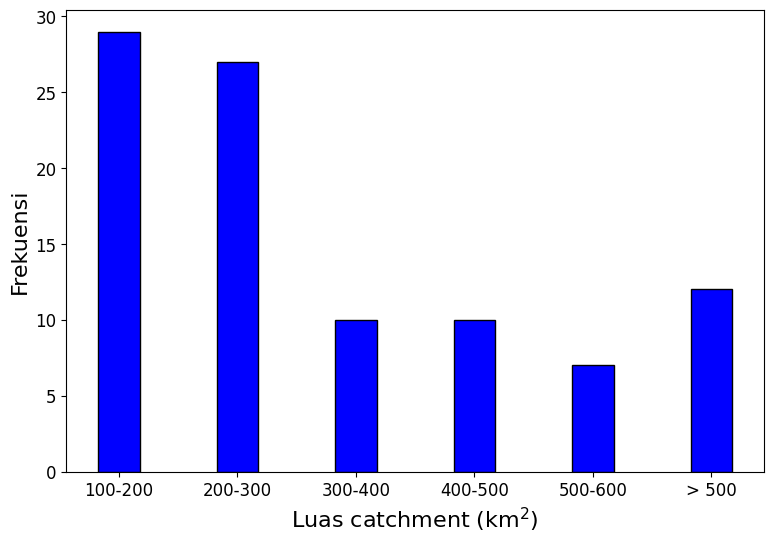

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(9, 6))
# Load and preprocess the data
catchment_area = area_sort['area_km2']

# Define the bin edges
bin_edges = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# Assign the catchment areas to the corresponding bins
bin_indices = np.digitize(catchment_area, bin_edges)

# Calculate the frequencies for each bin
bin_frequencies = np.bincount(bin_indices)

# Split the data into two parts based on the threshold
threshold = 500
x1 = bin_edges[:5]
y1 = bin_frequencies[:5]
x2 = ["> 500"]
y2 = np.sum(bin_frequencies[5:])

# Add the total frequency to the "> 1000" category
if y2 > 0:
    x1 = np.append(x1, x2[0])
    y1 = np.append(y1, y2)

# Create an array of x-axis positions
x_pos = np.arange(len(x1))

# Set the width of the bars
bar_width = 0.35

plt.bar(x_pos, y1, color='blue', width=bar_width, edgecolor='black')

# Modify x-axis labels to represent the ranges
x_labels = [f"{bin_edges[i]}-{bin_edges[i+1]}" for i in range(len(x1)-1)]
x_labels.append(x1[-1])

# Set the labels on the x-axis
plt.xticks(x_pos, x_labels)

plt.xlabel('Luas catchment ($\mathrm{km}^2$)', size=16)
plt.ylabel('Frekuensi', size=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the chart
plt.show()


AttributeError: ignored

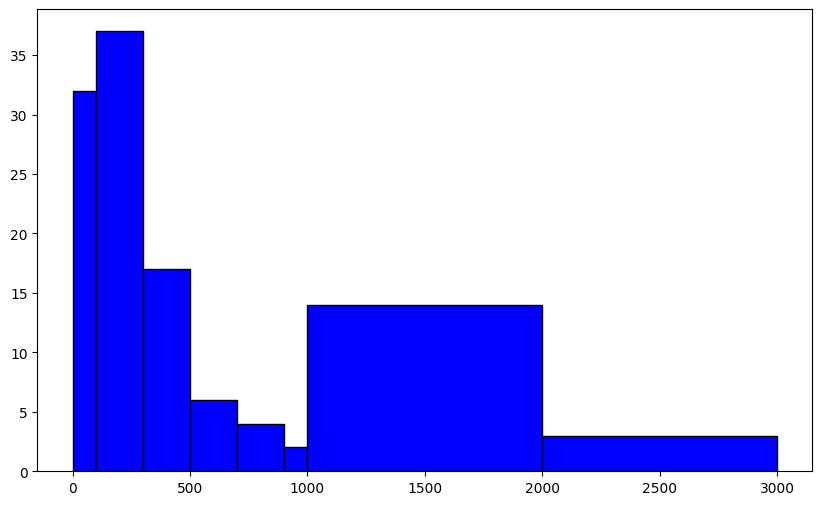

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 6))
# Load and preprocess the data
catchment_area = area_sort['area_km2']

# Define the bin edges
bin_edges = [100, 300, 500, 700, 900, 1000, 2000, 3000]

# Assign the catchment areas to the corresponding bins
bin_indices = np.digitize(catchment_area, bin_edges)

# Calculate the frequencies for each bin
bin_frequencies = np.bincount(bin_indices)

# Split the data into two parts based on the threshold
threshold = 1000
x1 = bin_edges[:12]
y1 = bin_frequencies[:12]
x2 = [10000]  # Use a large value to represent "> 1000" category
y2 = np.sum(bin_frequencies[12:])

# Add the total frequency to the "> 1000" category
if y2 > 0:
    x1 = np.append(x1, x2[0])
    y1 = np.append(y1, y2)

# Create an array of x-axis positions
x_pos = np.arange(len(x1))

# Set the bin edges for the histogram
bin_edges = np.concatenate(([0], x1))

plt.hist(catchment_area, bins=bin_edges, color='blue', edgecolor='black')

# Set the x-axis labels
x_labels = x1.astype(str)
x_labels[-1] = "> 1000"
plt.xticks(np.arange(len(x1)), x_labels)

plt.xlabel('Luas catchment ($\mathrm{km}^2$)', size=16)
plt.ylabel('Frekuensi', size=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the chart
plt.show()


In [ ]:
area_sort['area_km2'].max()

6991.114996503162

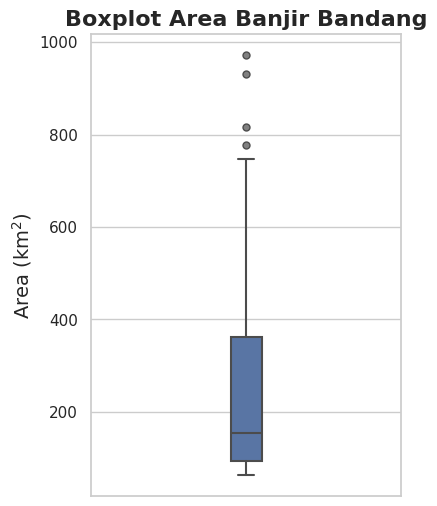

In [ ]:
# use to set style of background of plot
import seaborn
seaborn.set(style="whitegrid")

fig = plt.figure(figsize=(4, 6))
ax = sns.boxplot(data=data, y='area_km2', width=0.1, flierprops={'marker': 'o', 'markerfacecolor': 'gray', 'markersize': 5})

# plt.xlabel("Luas", size=14)
plt.ylabel("Area ($\mathrm{km}^2$)", size=14)
ax.set_title('Boxplot Area Banjir Bandang', fontsize=16, fontweight="bold")

plt.show()

In [ ]:
(data.describe())

,LABEL,area_m2,area_km2,tahun
count,93.0,9.300000e+01,93.000000,93.000000
mean,1.0,2.597754e+08,259.775425,2015.935484
std,0.0,2.224521e+08,222.452134,3.438296
min,1.0,6.377772e+07,63.777718,2011.000000
25%,1.0,9.333342e+07,93.333425,2012.000000
50%,1.0,1.551205e+08,155.120452,2016.000000
75%,1.0,3.622417e+08,362.241737,2020.000000
max,1.0,9.718958e+08,971.895778,2021.000000


In [ ]:
data.median()

<ipython-input-25-135339ac59ce>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.median()
<ipython-input-25-135339ac59ce>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


LABEL       1.000000e+00
area_m2     1.551205e+08
area_km2    1.551205e+02
tahun       2.016000e+03
dtype: float64